In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%%time
df_withoutduplicatefeatures4 = pd.read_csv("df_withoutduplicatefeatures4.csv",
              sep="\t", encoding="utf-8", low_memory=False)

CPU times: total: 1min 49s
Wall time: 1min 57s


In [3]:
df = df_withoutduplicatefeatures4

In [4]:
col_names=[]
for x in df.columns:
    col_names.append(x)

In [5]:
for i in range(len(df.columns)) :
    print(df.dtypes.index[i], ' : ', df.dtypes[i])

code  :  object
url  :  object
product_name  :  object
abbreviated_product_name  :  object
generic_name  :  object
quantity  :  object
packaging_en  :  object
packaging_text  :  object
brands  :  object
categories_en  :  object
origins_en  :  object
manufacturing_places  :  object
labels_en  :  object
emb_codes  :  object
first_packaging_code_geo  :  object
cities_tags  :  object
purchase_places  :  object
stores  :  object
countries_en  :  object
ingredients_text  :  object
ingredients_analysis_tags  :  object
allergens  :  object
traces_en  :  object
serving_size  :  object
serving_quantity  :  float64
no_nutrition_data  :  object
additives_n  :  float64
additives_en  :  object
nutriscore_score  :  float64
nutriscore_grade  :  object
nova_group  :  float64
pnns_groups_1  :  object
pnns_groups_2  :  object
food_groups_en  :  object
states_en  :  object
brand_owner  :  object
ecoscore_score  :  float64
ecoscore_grade  :  object
nutrient_levels_tags  :  object
product_quantity  :  float

In [6]:
index=0
for i in (df.loc[10]):
    print(str(col_names[index])+" : "+str(i))
    index+=1

code : 00000000001
url : http://world-en.openfoodfacts.org/product/00000000001/hyde-icon
product_name : hyde icon
abbreviated_product_name : nan
generic_name : nan
quantity : nan
packaging_en : nan
packaging_text : nan
brands : nan
categories_en : nan
origins_en : nan
manufacturing_places : nan
labels_en : nan
emb_codes : nan
first_packaging_code_geo : nan
cities_tags : nan
purchase_places : nan
stores : nan
countries_en : United States
ingredients_text : beta alanine, creatine hcl, ancient peat & apple extract (as elevatp), l-leucine, l-isoleucine, l-valine, betaine anhydrous, arginine silicate inositol (as nitrosigine), cordyceps militaris (cordyceps), ganoderma lucidum (reishi), pleurotus eryngii (king trumpet), lentinula edodes (shitake), hericium erinaceus (lion's mane), and trametes veriscolor (turkey tail) (as peako2), phyllanthus emblica (fruit) extract (as capros), nattokinase (as nsk-sd40), 1000 fu (fibronolytic units) of enzyme activity, aframomum melegueta (seed) (6-paradol

### Suppression autres features redondantes ou inutiles

In [7]:
cols_to_drop = ['energy-kj_100g', 'nutriscore_score', 'ecoscore_score',
               'nutrition-score-fr_100g', 'nutrition-score-uk_100g',
               'unique_scans_n', 'completeness', 'quantity']
def drop_columns(df, cols_to_drop):
    """
    Drop columns from a pandas DataFrame.

    Parameters:
        df (pandas DataFrame): The DataFrame to drop columns from.
        cols_to_drop (list): A list of column names to drop from the DataFrame.

    Returns:
        pandas DataFrame: The modified DataFrame with the specified columns dropped.
    """
    return df.drop(columns=cols_to_drop)

In [8]:
df = drop_columns(df, cols_to_drop)

### Suppression ligne en doublon, où product_name sont null

In [9]:
df = df.drop_duplicates()
df.shape

(2830745, 157)

In [10]:
df = df.dropna(subset=['product_name'])
df.shape

(2725818, 157)

### Suppression outliers des col _100g
Les features suffixées avec _100g indiquent la quantité de nutriment pour 100g de produit. Les valeurs < 0 ou > 100 sont donc abbérantes. Les lignes où au moins une des features n'est pas dans [0;100] sont supprimées. 
Sauf les features qui ont des unités différentes : energy-kj_100g, energy-kcal_100g, 'energy_100g', 'energy-from-fat_100g',  ph_100g, carbon-footprint_100g, carbon-footprint-from-meat-or-fish_100g, nutrition-score-fr_100g, nutrition-score-uk_100g

In [11]:
g_per_100g_features = ['fat_100g', 'saturated-fat_100g', 'butyric-acid_100g', 
                       'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 
                       'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 
                       'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 
                       'melissic-acid_100g', 'unsaturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 
                       'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 
                       'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 
                       'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 
                       'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 
                       'nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 
                       'added-sugars_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 
                       'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'erythritol_100g', 'fiber_100g', 
                       'soluble-fiber_100g', 'insoluble-fiber_100g', 'proteins_100g', 'casein_100g', 'serum-proteins_100g', 
                       'nucleotides_100g', 'salt_100g', 'added-salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 
                       'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 
                       'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 
                       'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 
                       'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 
                       'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 
                       'selenium_100g', 'chromium_100g', 'molybdenum_100g', 'iodine_100g', 'caffeine_100g', 
                       'taurine_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-dried_100g', 
                       'fruits-vegetables-nuts-estimate_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 
                       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g', 'glycemic-index_100g', 
                       'water-hardness_100g', 'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g', 
                       'carnitine_100g']

In [12]:
from def_outliers import outliers_nutrimentscols, handle_outliers

In [13]:
df = outliers_nutrimentscols(df, g_per_100g_features)

Les graisses saturées ne peuvent pas être supérieures au total de graisse, de même pour le sodium avec le sel, le sucre ajoutée avec le sucre, le sucre avec les glucides. L'énergie max en kJ/g ne peut pas être > 37 et kcal/g ne peut pas être> 9. Le ph se situe entre 0 et 14. Donc suppression des lignes si elles ne respectent pas ces conditions.

In [20]:
def outliers_nutrimentscols_others(df):
    """
    Filters a DataFrame based on certain conditions.

    This function removes rows where values from some columns that
    cannot be greater than other columns.

    Parameters:
        df (pandas.DataFrame): The DataFrame to be filtered.

    Returns:
        pandas.DataFrame: The filtered DataFrame.
    """
    # Delete rows where the nutrient type value cannot be greater than the nutrient total.
    df = df[~(df['saturated-fat_100g'] > df['fat_100g'])
            | (df['sodium_100g'] > df['salt_100g'])
            | (df['added-sugars_100g'] > df['sugars_100g'])
            | (df['sugars_100g'] > df['carbohydrates_100g'])]
    
    # Delete outliers from others nutrients cols with different unit
    df = df[~(df['energy_100g'] > 3700)]
    df = df[~(df['energy-from-fat_100g'] > 3700)]
    df = df[~(df['energy-kcal_100g'] > 900)]
    df = df[~((df['ph_100g'] < 0) | (df['ph_100g'] > 14))]
    
    return df

In [25]:
df = outliers_nutrimentscols_others(df)

In [26]:
df.to_csv("df_after100g.csv", sep='\t', encoding='utf-8', index=False)

In [35]:
%%time
df_after100g = pd.read_csv("df_after100g.csv",
              sep="\t", encoding="utf-8", low_memory=False)

CPU times: total: 1min 52s
Wall time: 2min 32s


In [36]:
df = df_after100g

### Outliers des cols sans _100g

outliers : 'serving_quantity', 'product_quantity', 
<br>
pas outliers : 'additives_n', 'nova_group', 

In [37]:
sigma_features = ['additives_n','serving_quantity','product_quantity']

In [38]:
#On initialise l'écart-type et la médiane
sigma = [0 for _ in range(len(sigma_features))]
median = [0 for _ in range(len(sigma_features))]
#Puis on complètes les valeurs avec le dataset sans les valeurs nulles
for i in range(len(sigma_features)):
  median[i] = df[pd.notnull(df[sigma_features[i]])][sigma_features[i]].median()
  serie = df[pd.notnull(df[sigma_features[i]])][sigma_features[i]]
  serie = serie.sort_values()
  sigma[i] = np.std(serie[:-25])

In [42]:
numerical_features = list(df.select_dtypes(include=["float64","int64"]).columns)

In [46]:
font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

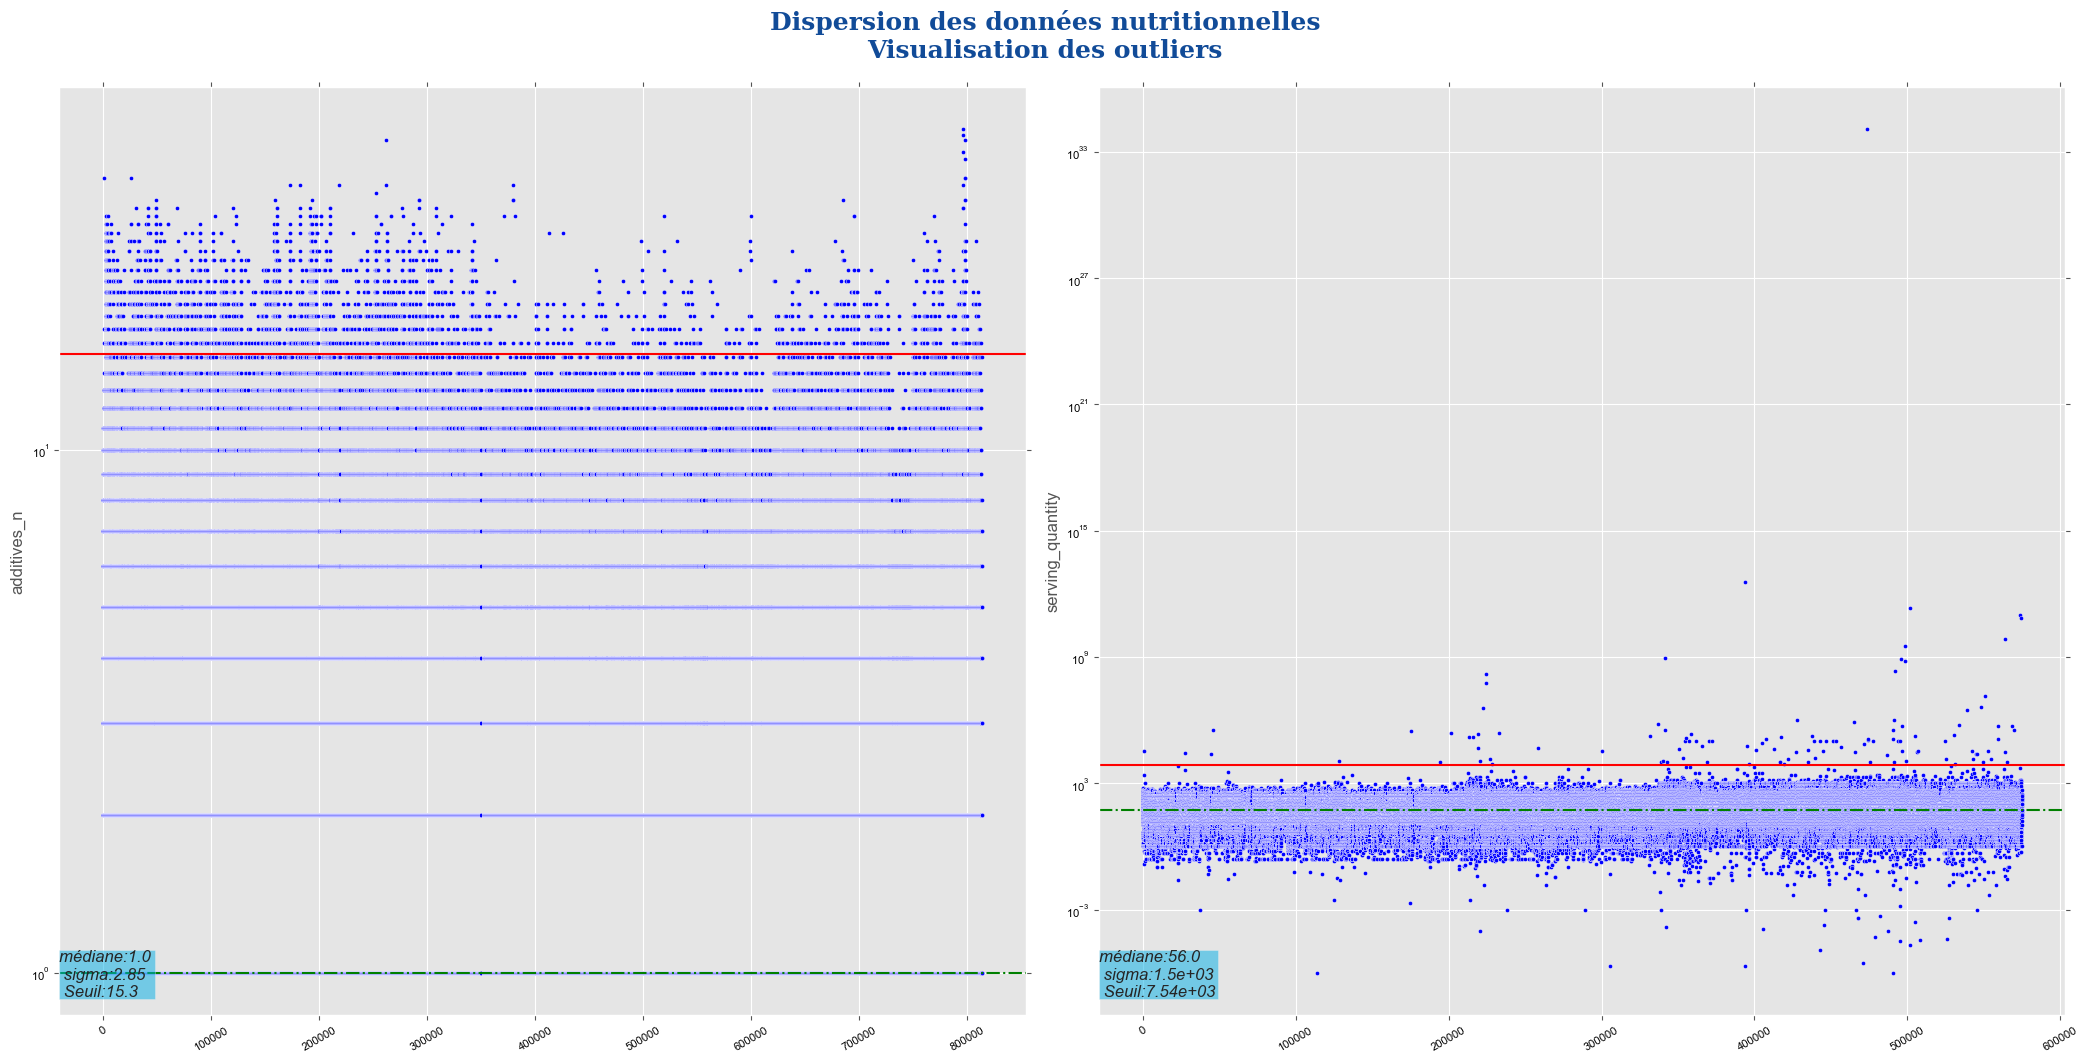

In [47]:
plt.style.use('ggplot')
tPlot, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(21,10))
axes = np.array(axes)

i=0
for ax in axes.reshape(-1):
    colonne = sigma_features[i]
    test = df[pd.notnull(df[colonne])][colonne]
    ax.tick_params(labelcolor='black',top='off',bottom='on',left='on',right='off',labelsize=8)
    ax.set_ylabel(colonne.rstrip("_100g"), fontsize = 12)
    ax.set_yscale("log")
    ax.plot(list(test), 'b.', markeredgewidth = 0.3, markeredgecolor='w')
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    ax.axhline(y=median[i], color='g', linestyle='dashdot')
    ax.axhline(y=median[i] + 5*sigma[i], color='r', linestyle='-')
    ax.text(0., 0.02, 'médiane:{:.3} \n sigma:{:.3} \n Seuil:{:.3}'.format(median[i], sigma[i], (median[i] + 5*sigma[i])),
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    i += 1

tPlot.text(0.5, 1.01, r"Dispersion des données nutritionnelles" "\n" "Visualisation des outliers", ha='center', fontdict=font_title)
plt.tight_layout()

In [48]:
for i in range(len(sigma_features)):
    col = sigma_features[i]
    threshold = (median[i] + 5*sigma[i])
    print('{:30}: suppression de la ligne si valeur > {}'.format(col, round(threshold,3)))
    mask = df[col] > threshold
    df = df.drop(df[mask].index)

additives_n                   : suppression de la ligne si valeur > 15.257
serving_quantity              : suppression de la ligne si valeur > 7543.171
product_quantity              : suppression de la ligne si valeur > 352310.255


In [27]:
df = handle_outliers(df, how = 'winsorize', numeric_cols=['serving_quantity','product_quantity'])
df.shape

(2704153, 157)

### Check cols non numériques

In [28]:
for i in range(len(df.columns)):
    if df.dtypes[i] == 'object':  # Vérifie si le type de données de la colonne n'est pas "object"
        print(df.dtypes.index[i], ' : ', df.dtypes[i])

code  :  object
url  :  object
product_name  :  object
abbreviated_product_name  :  object
generic_name  :  object
packaging_en  :  object
packaging_text  :  object
brands  :  object
categories_en  :  object
origins_en  :  object
manufacturing_places  :  object
labels_en  :  object
emb_codes  :  object
first_packaging_code_geo  :  object
cities_tags  :  object
purchase_places  :  object
stores  :  object
countries_en  :  object
ingredients_text  :  object
ingredients_analysis_tags  :  object
allergens  :  object
traces_en  :  object
serving_size  :  object
no_nutrition_data  :  object
additives_en  :  object
nutriscore_grade  :  object
pnns_groups_1  :  object
pnns_groups_2  :  object
food_groups_en  :  object
states_en  :  object
brand_owner  :  object
ecoscore_grade  :  object
nutrient_levels_tags  :  object
owner  :  object
data_quality_errors_tags  :  object
popularity_tags  :  object
main_category_en  :  object
image_small_url  :  object
image_ingredients_small_url  :  object
imag

In [29]:
df.select_dtypes(exclude=['number'])

,code,url,product_name,abbreviated_product_name,generic_name,packaging_en,packaging_text,brands,categories_en,origins_en,...,brand_owner,ecoscore_grade,nutrient_levels_tags,owner,data_quality_errors_tags,popularity_tags,main_category_en,image_small_url,image_ingredients_small_url,image_nutrition_small_url
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,jeunes pousses,NaN,NaN,NaN,NaN,endives,NaN,NaN,...,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,Andrè,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,unknown,NaN,NaN,en:energy-value-in-kcal-does-not-match-value-c...,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...
2,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,L.casei,NaN,NaN,NaN,NaN,NaN,NaN,Spain,...,NaN,unknown,NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...
3,00000000000026772226,http://world-en.openfoodfacts.org/product/0000...,Skyr,NaN,NaN,NaN,NaN,Danone,"Dairies,Fermented foods,Desserts,Fermented mil...",NaN,...,NaN,d,"en:fat-in-low-quantity,en:saturated-fat-in-low...",NaN,NaN,NaN,Cream cheeses,https://images.openfoodfacts.org/images/produc...,NaN,https://images.openfoodfacts.org/images/produc...
4,0000000000017,http://world-en.openfoodfacts.org/product/0000...,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,unknown,NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830750,3292590606497,http://world-en.openfoodfacts.org/product/3292...,Instant feerique,NaN,NaN,NaN,NaN,Thiriet,"Desserts,Frozen foods,Frozen desserts",NaN,...,NaN,unknown,"en:fat-in-moderate-quantity,en:saturated-fat-i...",NaN,en:serving-size-is-missing-digits,NaN,Frozen desserts,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...
2830751,35033264,http://world-en.openfoodfacts.org/product/3503...,DooWap,NaN,NaN,NaN,NaN,Harrys,"Snacks,Sweet snacks,Viennoiseries,Brioches",NaN,...,NaN,c,"en:fat-in-moderate-quantity,en:saturated-fat-i...",org-barilla,NaN,NaN,Brioches,https://images.openfoodfacts.org/images/produc...,NaN,https://images.openfoodfacts.org/images/produc...
2830752,39240958,http://world-en.openfoodfacts.org/product/3924...,Doowap,NaN,NaN,NaN,NaN,Harrys,"Snacks,Sweet snacks,Viennoiseries,Brioches",NaN,...,NaN,c,"en:fat-in-moderate-quantity,en:saturated-fat-i...",org-barilla,NaN,"bottom-25-percent-scans-2019,bottom-20-percent...",Brioches,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN
2830753,72355671,http://world-en.openfoodfacts.org/product/7235...,Almond Butter,NaN,NaN,NaN,NaN,Harrys,"Plant-based foods and beverages,Plant-based fo...",NaN,...,NaN,unknown,"en:fat-in-high-quantity,en:saturated-fat-in-hi...",org-barilla,NaN,NaN,Almond butters,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...


In [31]:
df[['categories_en','pnns_groups_1','pnns_groups_2','main_category_en',]].sample(10)

,categories_en,pnns_groups_1,pnns_groups_2,main_category_en
1820787,NaN,unknown,unknown,NaN
902977,NaN,unknown,unknown,NaN
983143,NaN,unknown,unknown,NaN
2439525,"Condiments,Sauces,Mustards,Groceries,fr:moutar...",Fat and sauces,Dressings and sauces,fr:moutardes-mi-fortes
2697303,"Condiments,Sauces,Groceries",Fat and sauces,Dressings and sauces,Groceries
947623,NaN,unknown,unknown,NaN
1607512,"Seafood,Canned foods,Fishes,Fatty fishes,Canne...",Fish Meat Eggs,Fish and seafood,Canned herrings
2677731,NaN,unknown,unknown,NaN
666872,"Plant-based foods and beverages,Plant-based fo...",Cereals and potatoes,Cereals,Pastas
2657026,NaN,unknown,unknown,NaN
